In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [5]:
digit_df = pd.read_csv('train.csv')

In [6]:
digit_df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [7]:
X_train = digit_df[digit_df.columns[1:785]]
X_train.shape

(42000, 784)

In [8]:
Y_train = digit_df['label']
Y_train.shape

(42000,)

In [9]:
test_df = pd.read_csv('test.csv')

In [10]:
test_df.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

In [11]:
X_test = test_df.copy()

In [21]:
X_test.shape

(28000, 784)

### Random Forest

In [12]:
clf_rf = RandomForestClassifier(n_estimators=100)

In [27]:
clf_rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [31]:
pred = clf_rf.predict(X_test)

In [32]:
pred

array([2, 0, 9, ..., 3, 9, 2])

In [34]:
np.savetxt('submission_rf.csv', np.c_[range(1,len(X_test)+1),pred], delimiter=',', header = 'ImageId,Label', comments = '', fmt='%d')

This gives an accuracy of 0.96614 on Kaggle.

### CNN

In [30]:
import lasagne
from lasagne import layers
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet
from nolearn.lasagne import visualize
import matplotlib.pyplot as plt

In [17]:
def CNN(n_epochs):
    net = NeuralNet(
        layers=[
        ('input', layers.InputLayer),
        ('conv1', layers.Conv2DLayer),      
        ('pool1', layers.MaxPool2DLayer),   
        ('conv2', layers.Conv2DLayer),
        ('hidden3', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],

    input_shape=(None, 1, 28, 28),
    conv1_num_filters=7, 
    conv1_filter_size=(3, 3), 
    conv1_nonlinearity=lasagne.nonlinearities.rectify,
        
    pool1_pool_size=(2, 2),
        
    conv2_num_filters=12, 
    conv2_filter_size=(2, 2),    
    conv2_nonlinearity=lasagne.nonlinearities.rectify,
        
    hidden3_num_units=1000,
    output_num_units=10, 
    output_nonlinearity=lasagne.nonlinearities.softmax,

    update_learning_rate=0.0001,
    update_momentum=0.9,

    max_epochs=n_epochs,
    verbose=1,
    )
    return net

In [22]:
target = Y_train.astype(np.uint8)
train = np.array(X_train).reshape((42000, 1, 28, 28)).astype(np.uint8)
test = np.array(X_test).reshape((28000, 1, 28, 28)).astype(np.uint8)
cnn = CNN(20).fit(train,target)

# Neural Network with 1739428 learnable parameters

## Layer information

  #  name     size
---  -------  --------
  0  input    1x28x28
  1  conv1    7x26x26
  2  pool1    7x13x13
  3  conv2    12x12x12
  4  hidden3  1000
  5  output   10

  epoch    trn loss    val loss    trn/val    valid acc  dur
-------  ----------  ----------  ---------  -----------  ------
      1     3.50609     1.07108    3.27341      0.64985  81.52s
      2     0.76239     0.58328    1.30707      0.81547  88.30s
      3     0.48515     0.44077    1.10068      0.86187  78.40s
      4     0.38084     0.37230    1.02294      0.88257  83.74s
      5     0.32310     0.33129    0.97529      0.89542  88.76s
      6     0.28473     0.30286    0.94012      0.90399  119.00s
      7     0.25605     0.28133    0.91015      0.91196  109.01s
      8     0.23280     0.26523    0.87772      0.91898  94.85s
      9     0.21323     0.25203    0.84604      0.92040  88.56s
     10     0.19658     0.24104    0.81554      0.92493

In [23]:
pred = cnn.predict(test)

In [24]:
np.savetxt('submission_cnn.csv', np.c_[range(1,len(test)+1),pred], delimiter=',', header = 'ImageId,Label', comments = '', fmt='%d')

In [25]:
from nolearn.lasagne.visualize import plot_loss
from nolearn.lasagne.visualize import plot_conv_weights
from nolearn.lasagne.visualize import plot_conv_activity

<module 'matplotlib.pyplot' from '/Users/leena/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py'>

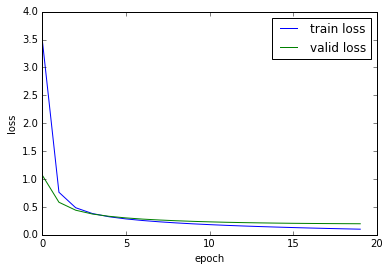

In [31]:
plot_loss(cnn)

<module 'matplotlib.pyplot' from '/Users/leena/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py'>

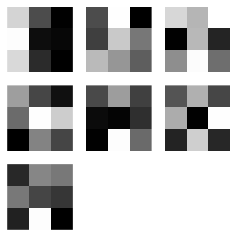

In [32]:
plot_conv_weights(cnn.layers_[1], figsize=(4, 4))

Visualzing the weights does not really give any information. We can change the number of filters and size to see if that gives any more information. 